In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense

In [2]:
df = pd.read_csv("data/prices-data.csv")

In [3]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [4]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

In [5]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [6]:
df.set_index(keys=["Timestamp"], inplace=True)

In [7]:
df.sort_index(inplace=True)

In [8]:
df = df["2021-03-20 00:00:00":].copy(deep=True)

In [9]:
df.ffill(inplace=True)

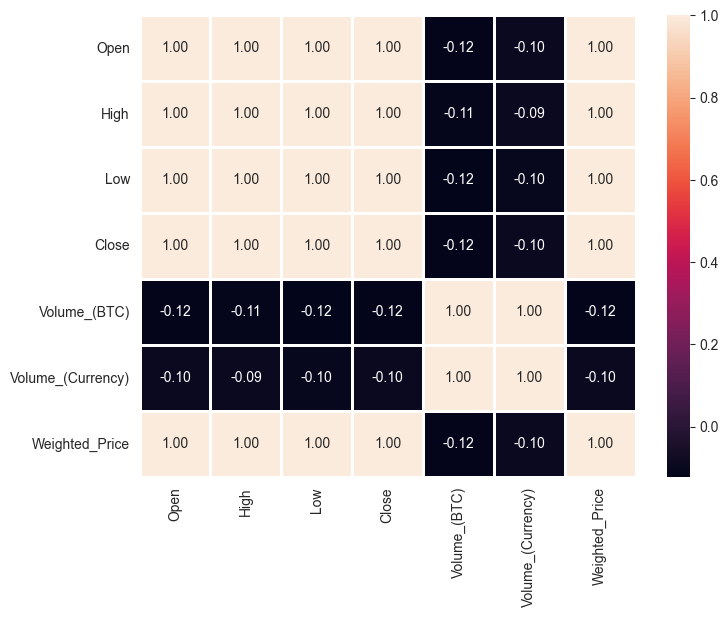

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Open", "High", "Low", "Close", "Volume_(BTC)", "Volume_(Currency)", "Weighted_Price"]].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

In [11]:
df = df[["Close"]].copy()

In [12]:
df

,Close
Timestamp,
2021-03-20 00:00:00,57984.41
2021-03-20 00:01:00,57898.50
2021-03-20 00:02:00,57902.49
2021-03-20 00:03:00,58093.58
2021-03-20 00:04:00,58020.43
...,...
2021-03-30 23:56:00,58686.00
2021-03-30 23:57:00,58685.81
2021-03-30 23:58:00,58723.84


In [13]:
lag = 3

In [14]:
periods = range(lag, 0, -1) # 3, 2, 1

In [15]:
df

,Close
Timestamp,
2021-03-20 00:00:00,57984.41
2021-03-20 00:01:00,57898.50
2021-03-20 00:02:00,57902.49
2021-03-20 00:03:00,58093.58
2021-03-20 00:04:00,58020.43
...,...
2021-03-30 23:56:00,58686.00
2021-03-30 23:57:00,58685.81
2021-03-30 23:58:00,58723.84


In [16]:
df.shift(periods=periods)

,Close_3,Close_2,Close_1
Timestamp,,,
2021-03-20 00:00:00,NaN,NaN,NaN
2021-03-20 00:01:00,NaN,NaN,57984.41
2021-03-20 00:02:00,NaN,57984.41,57898.50
2021-03-20 00:03:00,57984.41,57898.50,57902.49
2021-03-20 00:04:00,57898.50,57902.49,58093.58
...,...,...,...
2021-03-30 23:56:00,58698.50,58739.95,58714.31
2021-03-30 23:57:00,58739.95,58714.31,58686.00
2021-03-30 23:58:00,58714.31,58686.00,58685.81


In [17]:
list(periods)

[3, 2, 1]

In [18]:
df = pd.concat([df, df.shift(periods=periods)], axis=1)

In [19]:
df

,Close,Close_3,Close_2,Close_1
Timestamp,,,,
2021-03-20 00:00:00,57984.41,NaN,NaN,NaN
2021-03-20 00:01:00,57898.50,NaN,NaN,57984.41
2021-03-20 00:02:00,57902.49,NaN,57984.41,57898.50
2021-03-20 00:03:00,58093.58,57984.41,57898.50,57902.49
2021-03-20 00:04:00,58020.43,57898.50,57902.49,58093.58
...,...,...,...,...
2021-03-30 23:56:00,58686.00,58698.50,58739.95,58714.31
2021-03-30 23:57:00,58685.81,58739.95,58714.31,58686.00
2021-03-30 23:58:00,58723.84,58714.31,58686.00,58685.81


In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df

,Close,Close_3,Close_2,Close_1
Timestamp,,,,
2021-03-20 00:03:00,58093.58,57984.41,57898.50,57902.49
2021-03-20 00:04:00,58020.43,57898.50,57902.49,58093.58
2021-03-20 00:05:00,57942.98,57902.49,58093.58,58020.43
2021-03-20 00:06:00,57970.36,58093.58,58020.43,57942.98
2021-03-20 00:07:00,57944.74,58020.43,57942.98,57970.36
...,...,...,...,...
2021-03-30 23:56:00,58686.00,58698.50,58739.95,58714.31
2021-03-30 23:57:00,58685.81,58739.95,58714.31,58686.00
2021-03-30 23:58:00,58723.84,58714.31,58686.00,58685.81


In [22]:
X, y = df.drop(columns=["Close"]), df["Close"]

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [24]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [25]:
train_X.shape[0]

12670

In [26]:
train_X.shape[1] // 3

1

In [27]:
lag

3

In [28]:
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(12670, 3, 1)

In [29]:
train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag))

In [30]:
(train_X.shape[1], train_X.shape[2])

(3, 1)

In [31]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [34]:
history = model.fit(train_X, train_y, validation_split=0.2, epochs=64, batch_size=8)

Epoch 1/64
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1341891968.0000 - mean_squared_error: 1341891968.0000 - val_loss: 193190.6562 - val_mean_squared_error: 193190.6562
Epoch 2/64
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 682008.6875 - mean_squared_error: 682008.6875 - val_loss: 5238.5898 - val_mean_squared_error: 5238.5898
Epoch 3/64
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 11604.3779 - mean_squared_error: 11604.3779 - val_loss: 5864.7275 - val_mean_squared_error: 5864.7275
Epoch 4/64
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 11404.3828 - mean_squared_error: 11404.3828 - val_loss: 5273.4990 - val_mean_squared_error: 5273.4990
Epoch 5/64
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 12607.0664 - mean_squared_error: 12607.0664 - val_loss: 5921.2021 - val_mean_squared_error: 5921.2021
Epoch 6/64
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 12855.9053 - mean_squared_error: 12855.9053 - val_loss: 5236.2690 - val_mean_squared_error: 5236.2690


<Axes: >

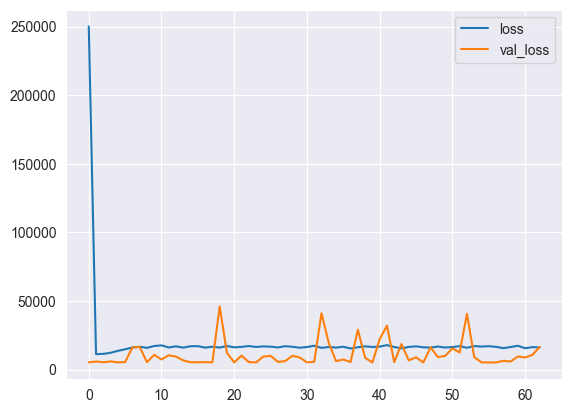

In [35]:
sns.lineplot(history.history['loss'][1:], label='loss')
sns.lineplot(history.history['val_loss'][1:], label='val_loss')

In [38]:
pred_y = model.predict(test_X)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
r2_score(test_y, pred_y)

0.9913549687109069